<a href="https://www.kaggle.com/code/selbymasemola/sales-data-analysis?scriptVersionId=184430415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**DATA LOADING**

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
data = pd.read_csv('/kaggle/input/project-1/Sales Data.csv')

**EXPLORATORY DATA ANALYSIS (EDA)**

In [2]:
data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
data.tail(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [4]:
data.shape

(185950, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


**DESCRIPTIVE STATISTICS**

In [6]:
data.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


**HANDLING MISSING VALUES**

In [7]:
#check missing values
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [8]:
# where zeros will be replaced with Nan
columns_with_zeros = ['Month','Sales','City','Hour']

# Replaces 0 with Nan in the specified columns
data[columns_with_zeros]= data[columns_with_zeros].replace(0,pd.NA)

# check the number of missing values per column
missing_values = data.isnull().sum()

missing_values

Unnamed: 0             0
Order ID               0
Product                0
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address       0
Month                  0
Sales                  0
City                   0
Hour                3910
dtype: int64

In [9]:
# we have to drop column 'Unnamed:0' because is not required 
data.drop(["Unnamed: 0"],axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,<NA>
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [10]:
data.drop(['Unnamed: 0'],axis=1).columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [11]:
data.drop(["Unnamed: 0"],axis=1).head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,<NA>
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


**DATA VISUALIZATION**

In [12]:
monthly_sales = data.groupby('Month')['Sales'].sum()
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

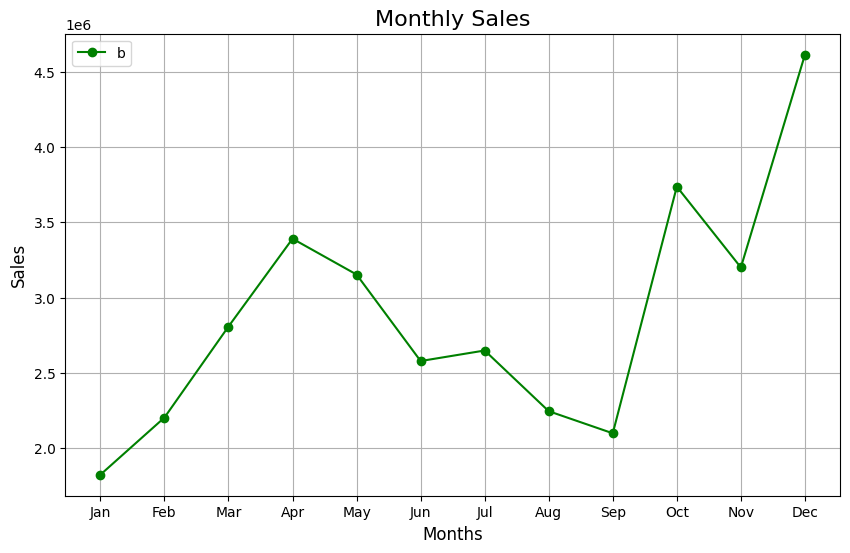

In [13]:
# create a line chart using the months
plt.figure(figsize=(10,6)) # Set the figure size
plt.plot(monthly_sales.index,monthly_sales.values, marker ='o', linestyle ='-', color='g',label='b')
plt.title('Monthly Sales', fontsize=16) #Set thetitlefor the plot
plt.xlabel('Months', fontsize=12) # Set the label for the x-axis
plt.ylabel('Sales', fontsize=12) #Set the label for the y-axis
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()#show legend
plt.grid(True) # show grid
plt.show()

*  Highest monthly sales were recorded in December followed by October and April consecutively.

* The lowest monthly sales were recorded in January and September.

In [14]:
data['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [15]:
data['Quantity Ordered'].unique()

array([1, 2, 4, 3, 7, 5, 6, 8, 9])

In [16]:
# Group data by 'Product' and sum Quantity Ordered for each product 
best_selling_products = data.groupby ('Product')['Quantity Ordered'].sum()

#Sort the products by Quantity Ordered to identify the best selling products 
best_selling_products = best_selling_products.sort_values(ascending=False)

best_selling_products

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

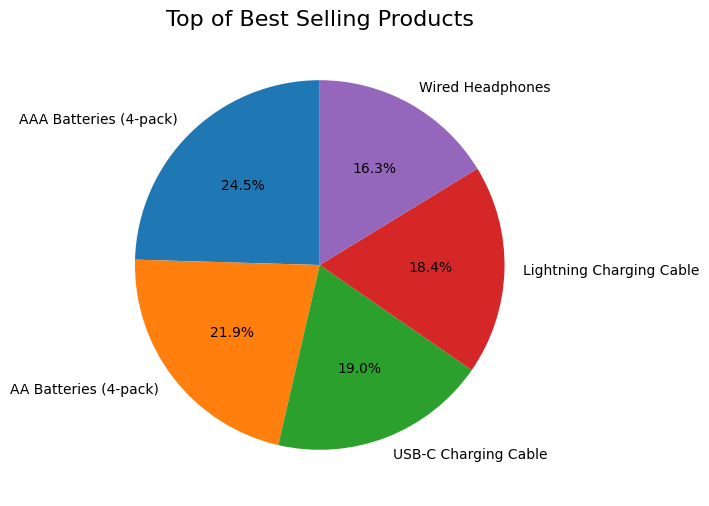

In [17]:
# Plotting a pie chart for the best selling products 
plt.figure(figsize=(8,6))# Set the figure size 
best_selling_products.head().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Top of Best Selling Products', fontsize =16) # Set the title for the plot
plt.ylabel ('')#Remove the y-axis label 
plt.show()

* The best selling products followed was AAA Batteries (4-pack) followed by AA Batteries(4-pack) as the second highest selling products and 
* The third highest selling products were USB-Charging Cable.

In [18]:
data['Hour'].unique()

array([<NA>, 7, 18, 15, 12, 22, 9, 23, 11, 13, 17, 19, 14, 16, 1, 6, 10,
       20, 21, 8, 3, 5, 2, 4], dtype=object)

In [19]:
# Group data by 'Hour' and sum the 'Sales' for each month 
Hourly_sales = data.groupby ('Hour')['Sales'].sum()
Hourly_sales

Hour
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

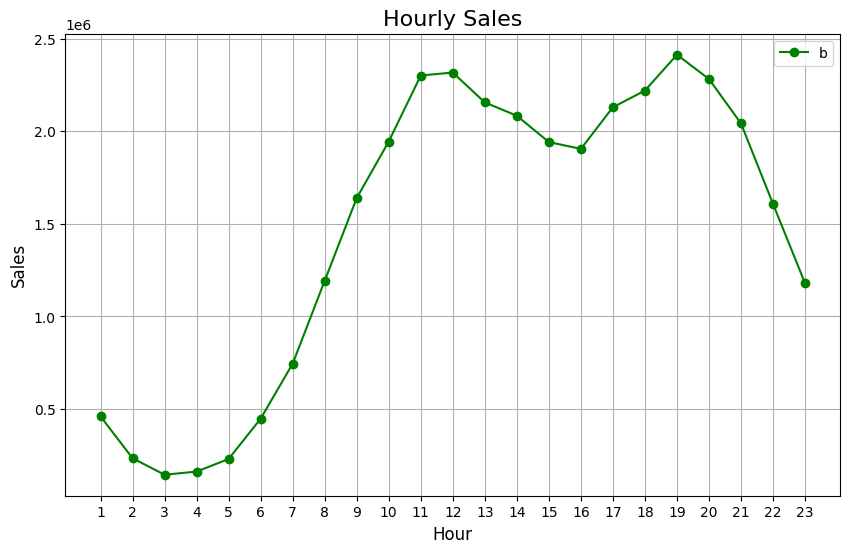

In [20]:
#Plotting line chart for the hourly sales 
plt.figure (figsize =(10,6))#set the figure size 
plt.plot (Hourly_sales.index, Hourly_sales.values, marker='o', linestyle='-', color='g', label='b')
plt.title ( 'Hourly Sales',fontsize =16)# set the title for the plot 
plt.xlabel ('Hour',fontsize =12)#set labels for x-axis 
plt.ylabel ('Sales',fontsize =12)#set labels for the y-axis 
plt.xticks (range (1,24))#set the x-axis ticks to show hours
plt.legend ()# show legend 
plt.grid (True) # show grid 
plt.show ()

* Peak hours were between 11 and 20 hours,  with 19th hour recording the highest sales.  
* The lowest sales were recorded at 3rd hour.

In [21]:
data['Purchase Address'].unique

<bound method Series.unique of 0         136 Church St, New York City, NY 10001
1            562 2nd St, New York City, NY 10001
2           277 Main St, New York City, NY 10001
3            410 6th St, San Francisco, CA 94016
4                  43 Hill St, Atlanta, GA 30301
                           ...                  
185945             795 Pine St, Boston, MA 02215
185946     495 North St, New York City, NY 10001
185947     319 Ridge St, San Francisco, CA 94016
185948      916 Main St, San Francisco, CA 94016
185949            209 11th St, Atlanta, GA 30301
Name: Purchase Address, Length: 185950, dtype: object>

In [22]:
#Group data by 'Purchase Address' and sum the 'Sales' for each month 
City_by_sales = data.groupby ('Purchase Address')['Sales'].sum()

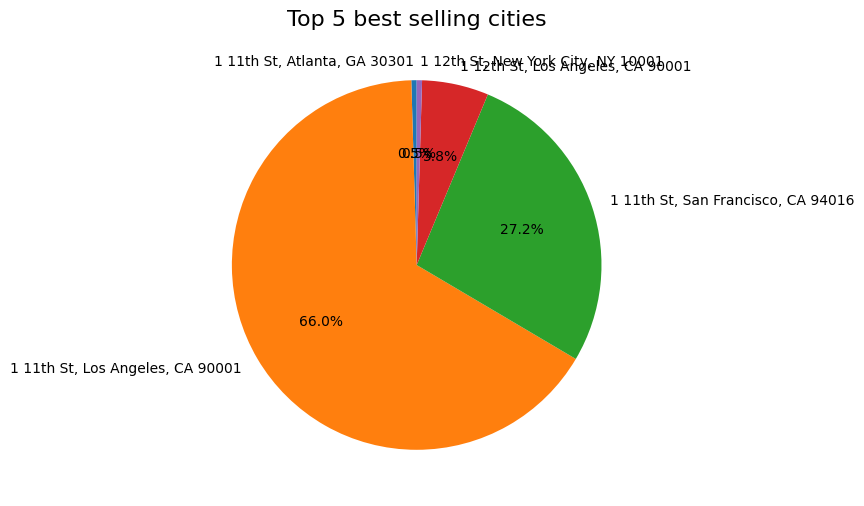

In [23]:
# Plotting a pie chart for the best selling cities 
plt.figure (figsize =(8,6))# set the figure size 
City_by_sales.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title ('Top 5 best selling cities', fontsize =16)# set the title for the plot 
plt.ylabel ('')#Remove the y-axis labels
plt.show ()

* The highest selling location was Los Angeles followed by St.San Francisco